# **DownUnderCTF2021**

# **Substitution Cipher I**

**Problem:**

*substitution-cipher-i.sage*

```
def encrypt(msg, f):
    return ''.join(chr(f.substitute(c)) for c in msg)

P.<x> = PolynomialRing(ZZ)
f = 13*x^2 + 3*x + 7

FLAG = open('./flag.txt', 'rb').read().strip()

enc = encrypt(FLAG, f)
print(enc)
```

*output.txt*

𖿫𖝓玲𰆽𪃵𢙿疗𫢋𥆛🴃䶹𬑽蒵𜭱𫢋𪃵蒵🴃𜭱𩕑疗𪲳𜭱窇蒵𱫳



**Solve:**

- Giải phương trình bậc 2 là xong, lấy nghiệm nguyên dương :D



```
import math

flag = '𖿫𖝓玲𰆽𪃵𢙿疗𫢋𥆛🴃䶹𬑽蒵𜭱𫢋𪃵蒵🴃𜭱𩕑疗𪲳𜭱窇蒵𱫳'

ans = [60323, 55323, 57323, 58565, 55321, 57171, 63917, 55424, 56765, 55400, 56565, 55369, 56959, 30103, 55406, 56459, 55380, 56731, 55359, 56579, 19897, 55409, 56445, 33973, 55346, 57201, 55406, 56459, 55400, 56565, 33973, 55359, 56579, 55346, 57201, 55397, 56657, 30103, 55403, 56499, 55346, 57201, 31367, 33973, 55430, 57075]
def get(x):
    return (-3+int(math.sqrt(9-4*13*(7-x))))//26

for x in flag:
    print(chr(get(ord(x))), end = '')
    
```

**FLAG:**
> DUCTF{sh0uld'v3_us3d_r0t_13}



# **Substitution Cipher II**

**Problem:**

*substitution-cipher-ii.sage*

```
from string import ascii_lowercase, digits
CHARSET = "DUCTF{}_!?'" + ascii_lowercase + digits
n = len(CHARSET)

def encrypt(msg, f):
    ct = ''
    for c in msg:
        ct += CHARSET[f.substitute(CHARSET.index(c))]
    return ct

P.<x> = PolynomialRing(GF(n))
f = P.random_element(6)

FLAG = open('./flag.txt', 'r').read().strip()

enc = encrypt(FLAG, f)
print(enc)

```

*output.txt*

Ujyw5dnFofaou0au3nx3Cn84








**Solve**

Nhận xét:

- $f = P.randomelement(6)$ là hàm random ra đa thức bậc 6, nghĩa là $a*x^6 + b*x^5 + c*x^4 + d*x^3 + e*x^2 + f*x + g$

- Mình đoán được FLAG có các kí tự đầu là: 'DUCTF{' lần lượt nằm ở vị trí trong CHARSET là 0, 1, 2, 3, 4, 5 => $g = 1$ (do trong encrypted thì chữ cái đầu tiên là 'U' có index là 1 trong CHARSET)

- Với chữ cái tiếp theo trong FLAG: 'U' (index trong CHARSET là 1) thì đa thức trở thành: $a+b+c+d+e+f+1$ = 20 (do trong encrypted thì chữ cái đầu tiên là 'j' có index là 20 trong CHARSET)

=> Brute force 5 biến a, b, c, d, e, sau đó dựa vào phép tính trên để tìm f ở mỗi lần chạy, và g = 1, nếu đa thức đó cho ra dãy kết quả mỗi lần mình đưa 'DUCTF' == 'Ujyw5d' thì đó có khả năng là đa thức đúng

***code bruteforce:***

```
for a in range(0,47):
    for b in range(0,47):
        for c in range(0,47):
            for d in range(0,47):
                for e in range(0,47):
                    temp = (a+b+c+d+e+1) %47
                    if (temp < 20):
                        f = 20 - temp
                    else:
                        f = 67 - temp
                    ans = ""
                    for ch in FLAG:
                        x = CHARSET.index(ch)
                        fract = (a*pow(x,6) + b*pow(x,5) + c*pow(x,4) + d*pow(x,3) + e*pow(x,2) + f*x + 1) %47
                        ans = ans + CHARSET[fract]
                    if (ans == enc):
                        print(a,", ",b,", ",c,", ",d,", ",e,", ",f)
```

-> Và dĩ nhiên sẽ in ra được nhiều kết quả của (a, b, c, d, e, f). Việc còn lại là thử kết quả nào khi đưa dãy encrypted ra được 1 dãy kết quả có độ dài tương đương là xong!

***code check***

```
enc = "Ujyw5dnFofaou0au3nx3Cn84"
flag = ""
def cal_frac(x):
    fract = (a*pow(x,6) + b*pow(x,5) + c*pow(x,4) + d*pow(x,3) + e*pow(x,2) + f*x + 1) %47
    return fract

for i in range(len(enc)):
    for x in CHARSET:
        if (CHARSET[cal_frac(CHARSET.index(x))] == enc[i]):
            flag += x
            break

print(len(enc) == len(flag)))
print(flag)
```

> FLAG: DUCTF{go0d_0l'_l4gr4ng3}







# **Break Me!**

**Problem:**

AES encryption challenge.

> nc pwn-2021.duc.tf 31914

*aes-ecb.py*


```
#!/usr/bin/python3
import sys
import os
from Crypto.Cipher import AES
from base64 import b64encode

bs = 16 # blocksize
flag = open('flag.txt', 'rb').read().strip()
key = open('key.txt', 'r').read().strip().encode() # my usual password

def enc(pt):
    cipher = AES.new(key, AES.MODE_ECB)
    ct = cipher.encrypt(pad(pt+key))
    res = b64encode(ct).decode('utf-8')
    return res

def pad(pt):
    while len(pt) % bs:
        pt += b'0'
    return (pt)

def main():
    print('AES-128')
    while(1):
        msg = input('Enter plaintext:\n').strip()
        pt = flag + str.encode(msg)
        ct = enc(pt)
        print(ct)

if __name__ == '__main__':
    main()
```




**Solve:**

Mấu chốt bài này là tìm key là decrypt lại là lụm FLAG thôi!!! :D

Nhận xét 1:
- Khi mình không gửi gì lên server, tất nhiên server sẽ trả về cho mình đoạn mã sau khi chuyển base64 của AES_ECB('flag + key')
- Khi mình gửi đại 1 kí tự lên server, server sẽ trả về cho mình đoạn mã sau khi chuyển base64 của AES_ECB('flag + input + key + padding')

=> Bằng mắt thường có thể dễ dàng biết được độ dài của flag là 32, độ dài của key là 16.

Nhận xét 2:
- Do blocksize là 16, với cơ chế hoạt động của AES_ECB thì nó encrypt theo từng block, nên mình tạm sẽ không quan tâm đến 2 block đầu(FLAG), mình chỉ attack để lấy key, sau đó khôi phục lại FLAG
- 
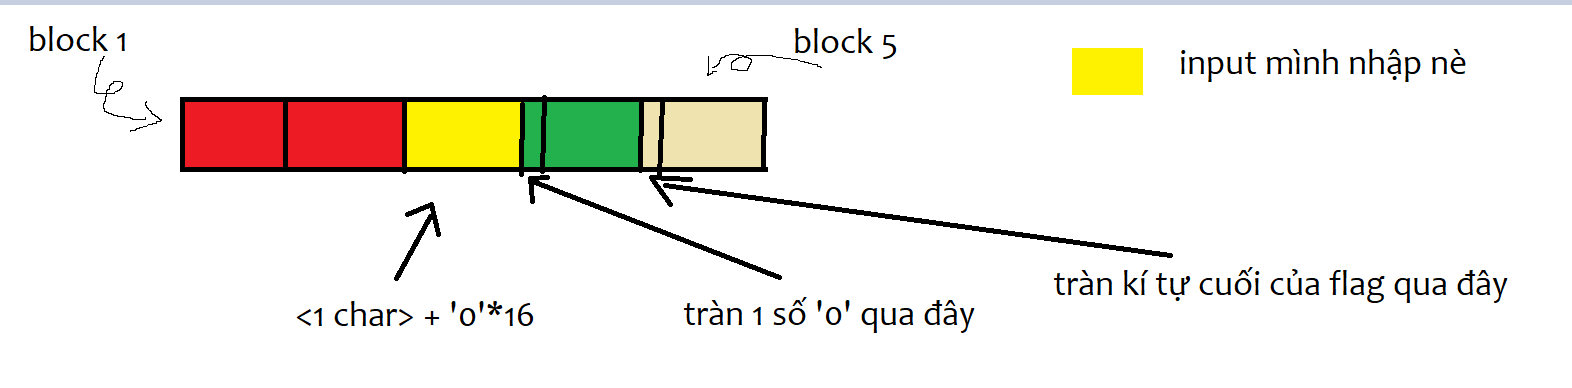

- Như hình trên, mình sẽ lợi dụng block 3 và 5 để brute force từng kí tự một trong KEY, nếu block 3 == block 5, nghĩa là kí tự đó đúng, sau đó mình brute kí tự tiếp theo + các kí tự đã đúng sẵn trước đó



```
from pwn import *
import base64
import sys
import os
from Crypto.Cipher import AES

flag_key = '\xf0\xc0*\xde\x91\xac\xef\xf2\x93r\xfd\x1c\xde(\xeaL\x98o\xff?U\xf1\x00;\x97\xd4\xe42E;\xd9\x82\x9b\xc5\xd6v\x11\xb0%\xbd\xd9\xfc\x95\x98\xd8ik\x95'

p = connect("pwn-2021.duc.tf", 31914)
p.recvuntil(b'AES-128')

for i in range(16):
    for j in range(33,127):
        p.recvuntil(b'Enter plaintext:')
        p.recvuntil(b'\n')
        char = chr(j)
        text = char + key + '0'*16
        p.sendline(text.encode())
        code = p.recvline()
        code = base64.b64decode(code)
        c1,c2,c3 = code[32:48], code[48:64], code[64:80]
        #p.recvline()
        if (c1 == c3):
            key = char+key
            print(key)
            break
```

Mình lụm được key = '!_SECRETSOURCE_!', sau đó decrypt lại thôi, dễ ẹc vl
```
key =   b'!_SECRETSOURCE_!'
def main():
    cipher = AES.new(key, AES.MODE_ECB)
    ct = cipher.encrypt(flag)
    res = base64.b64encode(ct).decode('utf-8')
    return res


flag = base64.b64decode(flag)

cipher = AES.new(key, AES.MODE_ECB)
enc = cipher.decrypt(base64.b64decode(flag))
print(enc)

```

> FLAG: DUCTF{ECB_M0DE_K3YP4D_D474_L34k}




**Treasure**

You and two friends have spent the past year playing an ARG that promises valuable treasures to the first team to find three secret shares scattered around the world. At long last, you have found all three and are ready to combine the shares to figure out where the treasure is. Of course, being the greedy individual you are, you plan to use your cryptography skills to deceive your friends into thinking that the treasure is in the middle of no where...

> nc pwn-2021.duc.tf 31901

**Problem**

*treasure.py*
```
#!/usr/bin/python3

import re
from Crypto.Util.number import long_to_bytes
from Crypto.Random import random
from secret import REAL_COORDS, FLAG_MSG

FAKE_COORDS = 5754622710042474278449745314387128858128432138153608237186776198754180710586599008803960884
p = 13318541149847924181059947781626944578116183244453569385428199356433634355570023190293317369383937332224209312035684840187128538690152423242800697049469987

def create_shares(secret):
    r1 = random.randint(1, p - 1)
    r2 = random.randint(1, p - 1)
    s1 = r1*r2*secret % p
    s2 = r1*r1*r2*secret % p
    s3 = r1*r2*r2*secret % p
    return [s1, s2, s3]

def reveal_secret(shares):
    s1, s2, s3 = shares
    secret = pow(s1, 3, p) * pow(s2*s3, -1, p) % p
    return secret

def run_combiner(shares):
    try:
        your_share = int(input('Enter your share: '))
        return reveal_secret([your_share, shares[1], shares[2]])
    except:
        print('Invalid share')
        exit()

def is_coords(s):
    try:
        return re.match(r'-?\d+\.\d+?, -?\d+\.\d+', long_to_bytes(s).decode())
    except:
        return False

def main():
    shares = create_shares(REAL_COORDS)
    print(f'Your share is: {shares[0]}')
    print(f'Your two friends input their shares into the combiner and excitedly wait for you to do the same...')

    secret_coords = run_combiner(shares)
    print(f'The secret is revealed: {secret_coords}')
    if not is_coords(secret_coords):
        print('"Hey those don\'t look like coordinates!"')
        print('Your friends grow a bit suspicious, but you manage to convince them that you just entered a digit wrong. You decide to try again...')
    else:
        print('"Let\'s go get the treasure!!"')
        print('Your friends run off to the revealed location to look for the treasure...')
        exit()

    secret_coords = run_combiner(shares)
    if not is_coords(secret_coords):
        print('"This is way too sus!!"')
        exit()

    if secret_coords == FAKE_COORDS:
        print('You\'ve successfully deceived your friends!')

        try:
            real_coords = int(input('Now enter the real coords: '))
            if real_coords == REAL_COORDS:
                print(FLAG_MSG)
            else:
                print('Incorrect!')
        except:
            print('Incorrect!')
    else:
        print('You are a terrible trickster!')

if __name__ == '__main__':
    main()
```

**Solve**

He he bài này tui sẽ không ghi code cụ thể tại vì tui lấy kết quả từ server là tui chơi bằng mấy số đó luôn, ra được FLAG là thôi à, nên là đưa ra từng bước giải cho hình dung thôi nhá ༼ つ ◕_◕ ༽つ

Nhận xét củ chuối 1: 
- Khi server hỏi: 'your share is: ' lần đầu, mình điền cái quần què gì nó cũng ra REAL_COORDS. Vì sao á? vì nhìn vô hàm reveal_secret đi các ngài: $(r1*r2*REALCOORDS)^3 * (r1^3*r2^3*REALCOORDS^2)^(-1)$ lại chả bằng REALCOORDS    :-D
- Bypass is_coord lần đầu tui gửi lên server số 1, thực chất là gửi cái gì tui cũng không chắc chắn lắm ở hàm is_coords, hình như là check xem sau khi decode xong có ra cái tọa độ hay không ấy, nhưng tui gửi số 1 nó cũng pass he he mlem

Nhận xét củ chuối 2:
- Giờ mới căng nè, giờ mình phải gửi lên server 1 cái số nào đó, sau khi số đó kết hợp với s2 và s3 (được random) để nó return từ hàm reveal_secret ra 1 số = FAKE_COORDS mà mình biết sẵn.

- Thì reveal_secret = $(<input>*REALCOORDS)^3 * (r1^3*r2^3*REALCOORDS^2)^(-1)$. Vậy bây giờ mình chỉ cần nhập vào 1 sao cho vế đầu trước dấu $*$ nó trở thành $(r1^3*r2^3*REALCOORDS^2 * FAKECOORDS)$ là xong, đúng hok 😎

- À quên, nhớ tìm số làm sao nó ^3 %p == FAKECOORDS

```
for i in range(100000):
    temp = FAKE_COORDS + p*i
    b, check = gmpy2.iroot(temp, 3)
    if (check == True):
        print("b = ", b)
        break

```

- Mình lần lượt tính các giá trị: $REALCOORDS^(-1)$, $REALCOORDS^(2/3)$, rồi nhân các thành phần từ output ban đầu mình nhận được lần đầu tiên ($r1*r2*REALCOORDS$) là lụm được flag

```
print('%.15f' % pow(REAL_COORDS,2/3))
```

```
temp = pow(m,3)*REAL_COORDS_1 %p
d = inverse(3, p-1)
msg = pow(temp, d, p)
```

>FLAG: DUCTF{m4yb3_th3_r34L_tr34sur3_w4s_th3_fr13nDs_w3_m4d3_al0ng_Th3_W4y.......}


Phần này không nên đọc nhưng nếu các anh hai nào thắc mắc em code cái quần què gì ở bài này thì full ở đây, em tới đâu em làm tới đó giờ đọc lại còn lú mà :v. Nhưng về cơ bản ý tưởng như trên nếu mà từng thử giải bài này có được hay không được thì đọc qua ý tưởng trên chắc là sẽ giải đc 100% đó 🤡

```
import re
from Crypto.Util.number import *
from Crypto.Random import random
import gmpy2

REAL_COORDS = 5756627544102572649201219381096443309301530404084814366157678459246004007288774904822314549
FAKE_COORDS = 5754622710042474278449745314387128858128432138153608237186776198754180710586599008803960884
p = 13318541149847924181059947781626944578116183244453569385428199356433634355570023190293317369383937332224209312035684840187128538690152423242800697049469987
REAL_COORDS2_3 = 3212023797359070207618890013558990479334108558649943801200640
REAL_COORDS_1 = 3611972407916542175266075914158485498567096639014910771412413427552155406084059648812480111141112665427480798617032727444845994871280603904723436033038518

def is_coords(s):
    try:
        return re.match(r'-?\d+\.\d+?, -?\d+\.\d+', long_to_bytes(s).decode())
    except:
        return False

print(long_to_bytes(REAL_COORDS))
print(long_to_bytes(FAKE_COORDS))
for i in range(100000):
    temp = FAKE_COORDS + p*i
    b, check = gmpy2.iroot(temp, 3)
    if (check == True):
        print("b = ", b)
        break

m = 2869341224917332313009265312495227025712569621383110354786034944049884444898065996165640916544755306105486353713866995648230401728598018943081224642657436
# print(pow(REAL_COORDS *REAL_COORDS_1 * REAL_COORDS2_3, 3, p))
# print('%.15f' % pow(REAL_COORDS,2/3))

# print(pow(REAL_COORDS,2))
# print(pow(3212023797359095191387490291951978689715826708825012842462276,3))
temp = pow(m,3)*REAL_COORDS_1 %p
d = inverse(3, p-1)
msg = pow(temp, d, p)
msg = 10954258416986940965254352563448744134121105790960391992791908032462708379320860571422885027991408179735966466488299908149056949839631488091514796075876201
print(msg)
print(pow(m,3)*REAL_COORDS_1 %p)

#msg * reveal
```




